In [39]:
!{sys.executable} -m pip install --user numpy
import numpy as np
!{sys.executable} -m pip install --user pandas
import pandas as pd
import csv
!{sys.executable} -m pip install --user matplotlib
from matplotlib import pyplot as plt
get_ipython().system('{sys.executable} -m pip install --user scikit-learn')
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



"{sys.executable}" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"{sys.executable}" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"{sys.executable}" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"{sys.executable}" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [40]:
df = pd.read_csv('data.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [41]:
df = df.replace("very_low", "1")
df = df.replace("Low", "2")
df = df.replace("Middle", "3")
df = df.replace("High", "4")

df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,1
1,0.08,0.08,0.10,0.24,0.90,4
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,4
254,0.78,0.61,0.71,0.19,0.60,3
255,0.54,0.82,0.71,0.29,0.77,4
256,0.50,0.75,0.81,0.61,0.26,3


C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

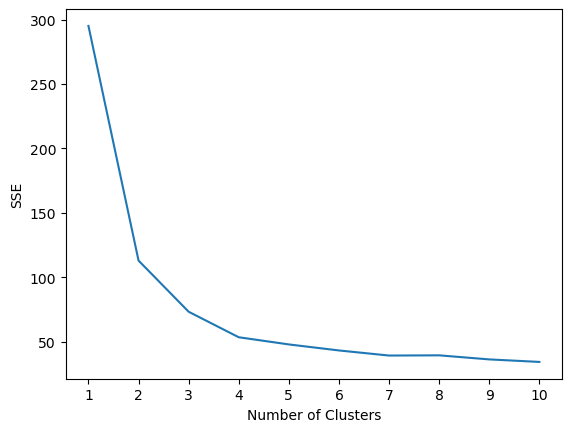

In [42]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}


sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(df)
 sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
kmeans = (KMeans(n_clusters = 3 ,init='random', n_init = 10 ,random_state= 1))
kmeans.fit(df)
df['cluster'] = kmeans.labels_
df

C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,STG,SCG,STR,LPR,PEG,UNS,cluster
0,0.00,0.00,0.00,0.00,0.00,1,0
1,0.08,0.08,0.10,0.24,0.90,4,1
2,0.06,0.06,0.05,0.25,0.33,2,0
3,0.10,0.10,0.15,0.65,0.30,3,2
4,0.08,0.08,0.08,0.98,0.24,2,0
...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,4,1
254,0.78,0.61,0.71,0.19,0.60,3,2
255,0.54,0.82,0.71,0.29,0.77,4,1
256,0.50,0.75,0.81,0.61,0.26,3,2


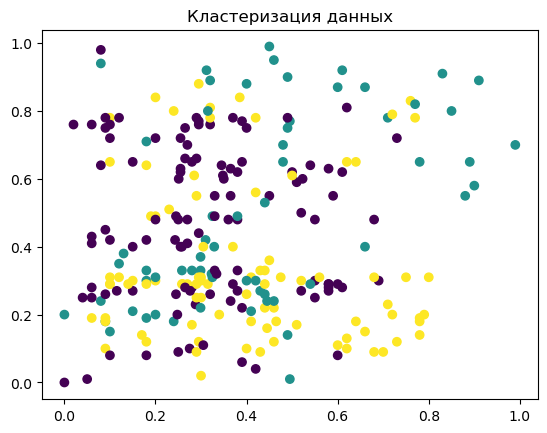

In [44]:
rr = plt.scatter(df['STG'], df['LPR'], c=df['cluster'], cmap='viridis')
plt.title('Кластеризация данных')
plt.show()

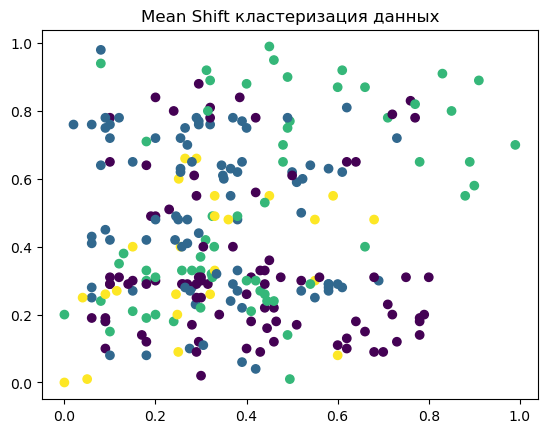

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Определяем оптимальную полосу пропускания для алгоритма Mean Shift
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)

# Применяем алгоритм Mean Shift для кластеризации данных
meanshift = MeanShift(bandwidth=bandwidth)
labels = meanshift.fit_predict(df)
df['cluster1'] = meanshift.labels_

# Визуализируем кластеры
plt.scatter(df['STG'], df['LPR'], c=df['cluster1'], cmap='viridis')
plt.title('Mean Shift кластеризация данных')
plt.show()

C:\Users\iliya\anaconda3\Lib\site-packages\sklearn\cluster\_bisect_k_means.py:246: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


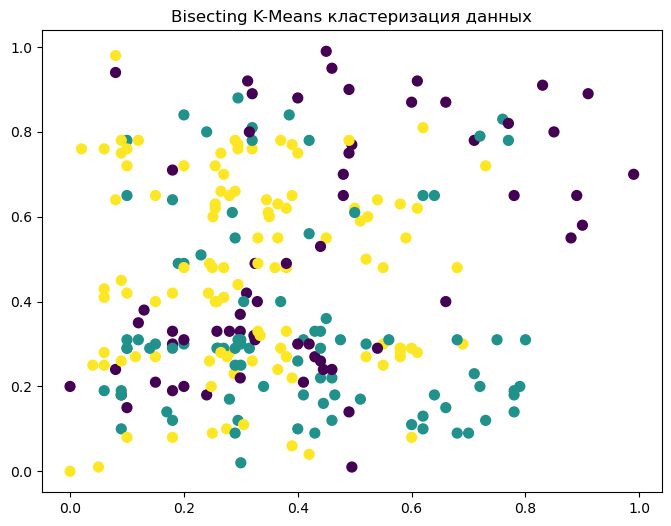

In [59]:
from sklearn.cluster import BisectingKMeans

bkm = BisectingKMeans(n_clusters=3)
bkm.fit(df)
labels = bkm.labels_

# Визуализируем кластеры
plt.figure(figsize=(8, 6))
plt.scatter(df['STG'], df['LPR'], c=labels, s=50, cmap='viridis')
plt.title('Bisecting K-Means кластеризация данных')
plt.show()


In [48]:
df

,STG,SCG,STR,LPR,PEG,UNS,cluster,cluster1
0,0.00,0.00,0.00,0.00,0.00,1,0,3
1,0.08,0.08,0.10,0.24,0.90,4,1,2
2,0.06,0.06,0.05,0.25,0.33,2,0,1
3,0.10,0.10,0.15,0.65,0.30,3,2,0
4,0.08,0.08,0.08,0.98,0.24,2,0,1
...,...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,4,1,2
254,0.78,0.61,0.71,0.19,0.60,3,2,0
255,0.54,0.82,0.71,0.29,0.77,4,1,2
256,0.50,0.75,0.81,0.61,0.26,3,2,0
